
# Assignment -Week3 

# Exercise 3.2 - Using Data  to Improve MLB Attendance

Course: DSC630 - Predictive Analytics<br>
Instructor: Fadi Alsaleem<br>

'''Karthikeyan Chellamuthu '''

 '''Date :06-26-2022'''

'''In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.

You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all your code and to document your steps, process, and analysis.'''

In [1]:
# Importing necessary libraries  

import numpy as np
import pandas as pd
# Plots 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
# Scikit learn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
#ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Create a from the given csv dodgers dataframe
dodg_df = pd.read_csv('dodgers-2022.csv') 
dodg_df.head(10)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


In [4]:
# dispaly the data type of the data frame
dodg_df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [5]:

# Verify the shape of the data frame 
dodg_df.shape



(81, 12)

In [6]:
# Summary description of your data frame 
dodg_df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


##### Visualizations

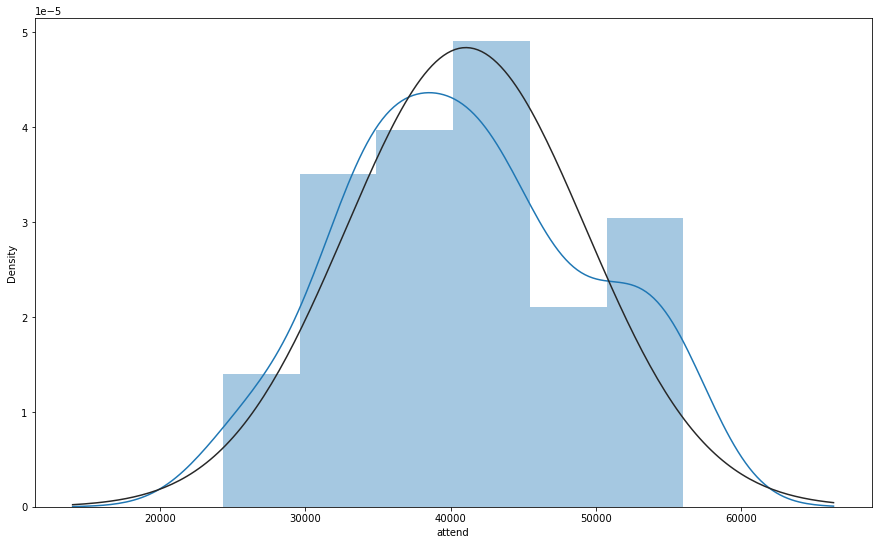

<Figure size 432x288 with 0 Axes>

In [7]:
# Basic plot of probability histogram and bell curve
plt.figure(figsize=(15,9))
sns.distplot(dodg_df['attend'], fit=norm);
fig = plt.figure()


In [10]:
# Verify and display the  kurtosis

print("Kurtosis: %f" % dodg_df['attend'].kurt())

'''Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.'''


Kurtosis: -0.753389


'Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.'

In [11]:
# Verify and display the  skewness


print("Skew %f" % dodg_df['attend'].skew())

'''Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness'''

Skew 0.137615


'Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness'

# Analysis  of  above Skewness & Kurtosis 

'''
The value of skewness is 0.13716 which is between -0.5 and 0.5 . Hence, the distribution is approximately symmetric.
The value for Kurtosus is -0.753389 and is less than 3.Hence ,the dataset has lighter tails than a normal distribution '''

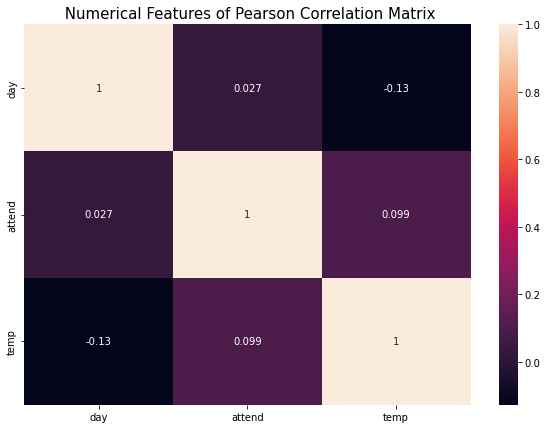

In [12]:
# Correlation and numerical Variables
co_mat = dodg_df.corr()

#  perfom the heatmap using the co_mat created in the previous step
plt.figure(figsize=(10,7))
sns.heatmap(co_mat, annot = True)
plt.title(' Numerical Features of Pearson Correlation Matrix', fontsize=15)
plt.show()

# Findings

''' 
This is to display the relation between numerical or non-categorical variables present in the data set , 
We could see the attendance is postively correlated to temperature. Hence anything with increase in temperature results in increase in head count

The day of the month is also positively correlated to the temperature,which means that people not interested much to go to  match during initial days of the months


'''
People interested to go out to see the match when temperature is good,  also they are interested to go out during mid and end of the month.



In [22]:
# Categorical Variables & dataframe
pd.set_option('display.max_columns', None)
catCols = ['month', 'day_of_week', 'opponent','skies','day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']
cat_dodg_df = pd.get_dummies(dodg_df, columns=catCols)
cat_dodg_df.head(10)

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,10,56000,67,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0
1,11,29729,58,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
2,12,28328,57,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,13,31601,54,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,14,46549,57,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
5,15,38359,65,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0
6,23,26376,60,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
7,24,44014,63,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
8,25,26345,64,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
9,27,44807,66,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0


In [25]:
# Perfom a a Spearman Correlation Matrix to understand the relation between the categorical & non-categorical variables
cat_dodg_df.corr('spearman').style.background_gradient(cmap="Blues")

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
day,1.000000,0.063626,-0.123692,0.104875,-0.028569,-0.079586,0.108461,0.153172,-0.293820,-0.113057,0.134612,-0.119007,0.083503,0.035273,0.172376,-0.090701,-0.165867,-0.106335,0.179090,0.141313,0.319518,0.038556,-0.237854,-0.216080,0.159502,0.130490,0.225262,-0.188335,0.053167,-0.131519,-0.264438,-0.021860,0.052969,0.029382,0.054252,-0.054252,0.052377,-0.052377,0.194109,-0.194109,0.037777,-0.037777,-0.091546,0.091546,-0.141919,0.141919
attend,0.063626,1.000000,0.090628,-0.055739,0.101270,0.096614,0.314192,-0.223536,-0.109043,-0.109991,-0.030209,-0.325514,0.128028,0.051787,-0.008776,0.333736,-0.167959,0.204106,-0.156575,-0.167758,-0.134038,0.015034,0.109043,-0.086529,0.002796,0.248580,0.204106,0.038644,-0.011184,-0.082481,-0.030756,-0.082328,-0.089049,0.139799,0.144553,-0.144553,0.031944,-0.031944,0.051039,-0.051039,-0.139799,0.139799,-0.015361,0.015361,-0.544860,0.544860
temp,-0.123692,0.090628,1.000000,-0.495820,0.296848,0.012656,-0.132964,-0.337159,0.268880,0.527833,-0.167878,-0.024568,-0.044672,0.237768,0.014286,-0.020895,0.010423,-0.184855,-0.226868,-0.278683,-0.059812,0.181659,0.082625,0.196922,0.032210,0.076901,-0.079824,-0.010099,-0.025208,-0.273081,-0.092428,0.161577,0.167468,-0.102230,0.259024,-0.259024,0.249189,-0.249189,-0.066466,0.066466,-0.011203,0.011203,0.178363,-0.178363,-0.074884,0.074884
month_APR,0.104875,-0.055739,-0.495820,1.000000,-0.198811,-0.173913,-0.147442,-0.222911,-0.081786,-0.173913,0.007013,-0.076087,0.007013,0.007013,0.037438,0.007013,0.021739,-0.081786,-0.081786,0.470270,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,-0.095050,0.470270,0.184302,-0.081786,0.470270,-0.081786,-0.147442,-0.147442,-0.081786,-0.343251,0.343251,0.069584,-0.069584,0.066354,-0.066354,-0.102233,0.102233,0.006808,-0.006808,0.063872,-0.063872
month_AUG,-0.028569,0.101270,0.296848,-0.198811,1.000000,-0.198811,-0.168550,-0.254824,-0.093495,-0.198811,0.051309,-0.019881,-0.035275,-0.035275,0.009782,-0.035275,0.069584,-0.093495,-0.093495,-0.093495,-0.108657,-0.146625,0.411377,0.134840,0.411377,-0.108657,-0.093495,-0.168550,-0.093495,-0.093495,-0.093495,0.134840,0.134840,-0.093495,0.188903,-0.188903,0.018182,-0.018182,-0.128951,0.128951,0.093495,-0.093495,-0.034245,0.034245,-0.089337,0.089337
month_JUL,-0.079586,0.096614,0.012656,-0.173913,-0.198811,1.000000,-0.147442,-0.222911,-0.081786,-0.173913,-0.087664,0.119565,-0.087664,0.007013,-0.106966,0.101690,0.021739,-0.081786,-0.081786,-0.081786,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,0.065347,-0.081786,0.184302,0.470270,-0.081786,0.470270,-0.147442,0.073721,-0.081786,-0.097204,0.097204,-0.019881,0.019881,-0.157591,0.157591,0.081786,-0.081786,0.006808,-0.006808,-0.139015,0.139015
month_JUN,0.108461,0.314192,-0.132964,-0.147442,-0.168550,-0.147442,1.000000,-0.188982,-0.069338,-0.147442,0.059456,-0.036860,0.059456,-0.047565,0.072548,-0.047565,-0.036860,0.554700,-0.069338,-0.069338,-0.080582,-0.108740,-0.069338,-0.125000,-0.069338,0.463348,-0.069338,-0.125000,-0.069338,-0.069338,-0.069338,-0.125000,-0.125000,0.554700,0.103011,-0.103011,0.033710,-0.033710,0.056254,-0.056254,-0.138675,0.138675,-0.046176,0.046176,-0.089188,0.089188
month_MAY,0.153172,-0.223536,-0.337159,-0.222911,-0.254824,-0.222911,-0.188982,1.000000,-0.104828,-0.222911,0.008989,0.027864,0.008989,0.008989,-0.013710,0.008989,-0.055728,-0.104828,0.366900,-0.104828,0.4264

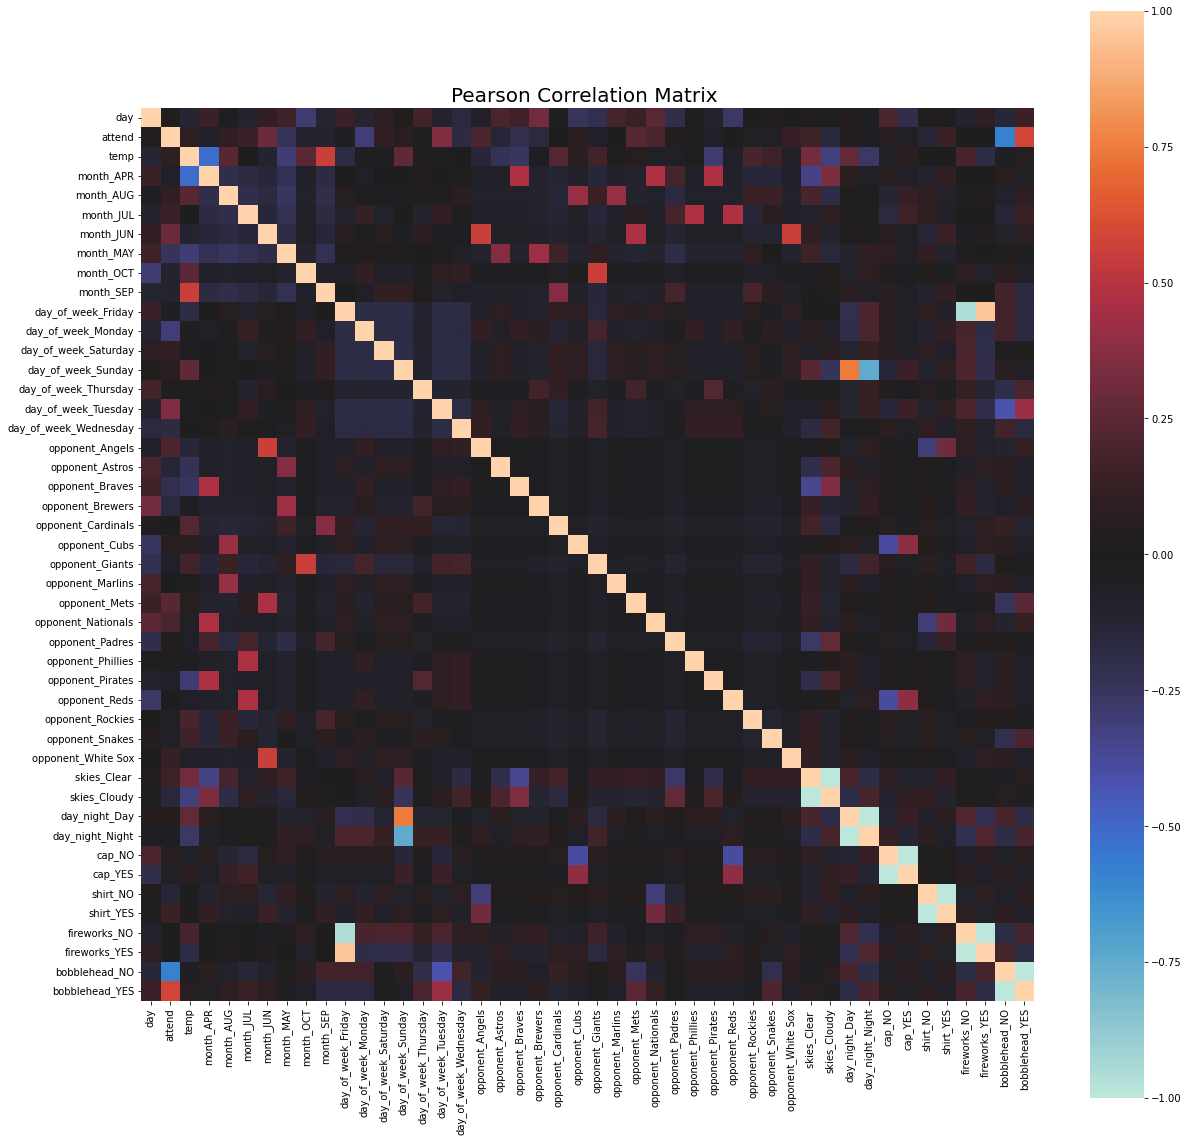

In [24]:
# Plotting heat map matrix for the correlation

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cat_dodg_df.corr(), center=0,  
           vmin=-1, vmax=1,  square=True)
# title
plt.title('Pearson Correlation Matrix ', fontsize=20)
plt.show()

In [26]:
# Verify the variables correlationg with attend Pearson correlation is used
df_correlations = cat_dodg_df.corr().stack().reset_index().sort_values(0, ascending=False)
df_correlations.loc[df_correlations['level_0'] == 'attend'].sort_values(0, ascending=False)

,level_0,level_1,0
47,attend,attend,1.000000
91,attend,bobblehead_YES,0.581895
61,attend,day_of_week_Tuesday,0.355316
52,attend,month_JUN,0.295853
71,attend,opponent_Mets,0.236213
63,attend,opponent_Angels,0.207796
72,attend,opponent_Nationals,0.195667
80,attend,skies_Clear,0.150963
51,attend,month_JUL,0.143837
87,attend,shirt_YES,0.133269


In [27]:
# perfrom the same steps for spearman correlation
df_correlations = cat_dodg_df.corr('spearman').stack().reset_index().sort_values(0, ascending=False)
df_correlations.loc[df_correlations['level_0'] == 'attend'].sort_values(0, ascending=False)

,level_0,level_1,0
47,attend,attend,1.000000
91,attend,bobblehead_YES,0.544860
61,attend,day_of_week_Tuesday,0.333736
52,attend,month_JUN,0.314192
71,attend,opponent_Mets,0.248580
72,attend,opponent_Nationals,0.204106
63,attend,opponent_Angels,0.204106
80,attend,skies_Clear,0.144553
79,attend,opponent_White Sox,0.139799
87,attend,shirt_YES,0.139799


In [28]:
# Linear Regression and Setting the value for X and Y
df = cat_dodg_df.copy()
y = df['attend']
x = df.drop('attend',1)

In [29]:
# display x
x.head(10)

,day,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,10,67,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0
1,11,58,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
2,12,57,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,13,54,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,14,57,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
5,15,65,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0
6,23,60,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
7,24,63,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
8,25,64,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
9,27,66,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0


In [30]:
#display y
y.head(10)

0    56000
1    29729
2    28328
3    31601
4    46549
5    38359
6    26376
7    44014
8    26345
9    44807
Name: attend, dtype: int64

In [31]:
# Regression,Split the dataframe for  test and train 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [32]:
#Display the Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  48020.11016548952
Coefficients:


[('day', 434.355000341727),
 ('temp', -53.287021631316165),
 ('month_APR', -5162.524705009922),
 ('month_AUG', 3252.9679797869258),
 ('month_JUL', -3729.480132314526),
 ('month_JUN', 1766.7257588288994),
 ('month_MAY', -3893.943253506471),
 ('month_OCT', 8168.691053597412),
 ('month_SEP', -402.436701382114),
 ('day_of_week_Friday', -13352.694193805717),
 ('day_of_week_Monday', -3978.044194345805),
 ('day_of_week_Saturday', 5313.480535971897),
 ('day_of_week_Sunday', -554.3668989426267),
 ('day_of_week_Thursday', 2490.266593191436),
 ('day_of_week_Tuesday', 10399.83674737709),
 ('day_of_week_Wednesday', -318.47858944643565),
 ('opponent_Angels', 4135.503696219865),
 ('opponent_Astros', -3366.4059260586882),
 ('opponent_Braves', -2421.7729629577757),
 ('opponent_Brewers', -6672.283749237911),
 ('opponent_Cardinals', -2123.0602836752814),
 ('opponent_Cubs', 7205.264409220857),
 ('opponent_Giants', -4713.739008370041),
 ('opponent_Marlins', -10059.067173755366),
 ('opponent_Mets', -2415.75

In [33]:
# Test data set Predictions
y_pred_mlr= mlr.predict(x_test)
print("Prediction of test set: {}".format(y_pred_mlr))

Prediction of test set: [61112.14490535 50688.62495422 44441.81566532 49289.03661167
 42609.46252332 35508.12736722 36392.42139352 34985.92659206
 31947.84512894 45389.80584226 62754.08093432 50082.63692479
 37093.74548468 30701.01392035 32388.56614008 38632.25077381
 25695.74880189 45075.814302   57797.75681378 23857.82578383
 30606.84261022 34062.68411605 47054.54832527 35442.43761246
 37055.79617209]


In [34]:
# Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
11,48753,61112.144905
77,35607,50688.624954
25,33306,44441.815665
5,38359,49289.036612
62,40284,42609.462523


In [35]:
#Model prediction and evaluations

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))


Mean Absolute Error: 9637.865409141374
Mean Square Error: 128425071.68335876
Root Mean Square Error: 11332.478620467755
R squared: 32.04


In [36]:
    # My observationa and recommendations to be considerd to improve MLB attendance 

    ''' More games played in the summer has highly positively correlated, hence having more games in summer will help to gather more crowd.  Games over the weekends especially on sauterday has positive corelation, however tuesday also has positive correlation.  Considering this we cant have more games on the same days and they can try to arrange schedules accordingly to get more attendance. Cubs , Angesl, White sox and nationals has positive correlation hence it would be better to have those team schedule frequently will increase more audiance. Free giveaway goodies as t-shirt bobbleheads are positively corelated hence continue giving them will improve more audience. '''


' More games played in the summer has highly positively correlated, hence having more games in summer will help to gather more crowd.  Games over the weekends especially on sauterday has positive corelation, however tuesday also has positive correlation.  Considering this we cant have more games on the same days and they can try to arrange schedules accordingly to get more attendance. Cubs , Angesl, White sox and nationals has positive correlation hence it would be better to have those team schedule frequently will increase more audiance. Free giveaway goodies as t-shirt bobbleheads are positively corelated hence continue giving them will improve more audience. '